# Basic Sample problems Energy and Work

 <img src="images/line.png" alt="ml" style="width : 100%;"/>

<img src="images/e000.png" alt="ml" style="width : 100%;"/>

 * Remember that P= mparticle()  ... then 
 * Some function used in Energy
     * P.energia() = Sumatory Energy in A an B
          * P.energia(ktype='1') =  Energy in A
          * P.energia(ktype='2') =  Energy in B
          * P.energia(ktype='P1') =  Energy Potential in A
          * P.energia(ktype='E1') =  Energy kcinetic in A
          * etc.
     * P.simple_ac() = (Sum Force in X)/ mass
     * P.simple_ac(ktype='y') =  (Sum Force in Y)/ mass   

 <img src="images/line.png" alt="ml" style="width : 100%;"/>

In [1]:
from sympy import *
from polyclass import *
from libaldo_math import *
from libaldo_show import *
from physic_lib import *
from IPython.display import display, Math
init_printing()

<img src="images/e010.png" alt="ml" style="width : 100%;"/>

In [2]:
# Declaring P object with data get by problem 
P=mparticle(m=0.2,g=10,x1=0,x2=20,y1=0,y2=20)  # remmeber put x,y position if you have

In [3]:
# Total Energy in A = Total Energy in B
P.energia(ktype='p2') # ktype ='1' Energy total in A, 2=B, P1 pot in A pP2 is pot in B  . E1 is Enr Kcin in A. etc.

In [4]:
show_res(30+40,'Energy  \ in \ A \ is')

<IPython.core.display.Math object>

 <img src="images/line.png" alt="ml" style="width : 100%;"/>

<img src="images/e020.png" alt="ml" style="width : 100%;"/>

In [20]:
N1,fr,T=symbols('N1 fr T')
P=mparticle(m=4,g=10,x1=0,x2=1,ac=2,y1=0,y2=0)

In [21]:
P.add_forza(40,-pi/2)
P.store_val(N1,40)
P.add_forza(N1,pi/2)
P.store_val(fr,N1*0.2)
P.add_forza(fr,-pi)
P.add_forza(T,0)

In [22]:
P.work_x()

In [24]:
csolve(P.simple_ac('x')-2,T)

In [25]:
P.store_val(T,16)

In [26]:
P.work_x()

 <img src="images/line.png" alt="ml" style="width : 100%;"/>

<img src="images/e040.png" alt="ml" style="width : 100%;"/>

In [27]:
P=mparticle(y1=32,y2=1,v1=40,x1=0,g=10)

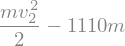

In [28]:
P.energia()

In [29]:
# answer default
v=csolve(P.energia(),v2,'v') # total sol

<IPython.core.display.Math object>

In [30]:
# the same answer but  ... 
v=csolve(P.energia(),v2,'v',kpositive=True) # only possitive

<IPython.core.display.Math object>

In [32]:
# the same answer but usefull type 
v=csolve(P.energia(),v2,'v',kpositive=True,kope='v')#   possitive and float

<IPython.core.display.Math object>

 <img src="images/line.png" alt="ml" style="width : 100%;"/>

<img src="images/e050.png" alt="ml" style="width : 100%;"/>

In [2]:
# Creating object to use from A to B
R=symbols('R')
P=mparticle(x1=0,x2=R,y1=R,y2=0,v1=0)

In [3]:
V2=csolve(P.energia(),powsimp(v2**2),'V_2') # is more easy fin squarw(V2) because used 

<IPython.core.display.Math object>

In [4]:
# Creating object to use from B to C
h=symbols('h')
P2=mparticle(x1=0,y1=h,y2=0,v=sqrt(2*R*g),a=0,ac=0) # using parabolic setup

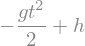

In [5]:
P2.y_pos()

In [6]:
csolve(P2.y_pos(),t**2) # Find t^2 when y2=0

In [7]:
P2.x_pos(t=sqrt(2*h/g),kope='2') # Find x when t=upper answer and kill sqrt whit kope='2'

In [8]:
# kope options..?? see below
opemat?

Signature: opemat(ksym, kope='')
Docstring:
opemat(Equation,kope=opt)
opt 
    'f'= factor(Equation),    
    't'= trigsimp(Equation)
    'x'= simplify(Equation)
    'v'= Equation.evalf()
    'a'= apart(Equation)
    'c'= cancel(Equation)
    'E'= Equation.expand(force=True)
    '2' = kill sqrt( x^2 )
File:      d:\onedrive\solvelib\fin_physic\libaldo_math.py
Type:      function


 <img src="images/line.png" alt="ml" style="width : 100%;"/>

<img src="images/e055.png" alt="ml" style="width : 100%;"/>

In [52]:
m,h,L,beta,V=symbols('m h L beta V',positive=True)
A=mparticle(m=2*m,y1=h,y2=h+L*sin(beta),v1=0,v2=V,a=beta)
B=mparticle(m=m,y1=h,y2=h-3*L*sin(A.a),v1=0,v2=3*V)

In [53]:
A.energia(ktype='1') # Energia Initial in A

In [54]:
B.energia(ktype='1') # Energia Initial in B

In [55]:
Eq1=A.energia(ktype='1')+B.energia(ktype='1');Eq1

In [56]:
A.energia(ktype='2') # Energia final in A

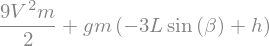

In [57]:
B.energia(ktype='2') # Energia final in B

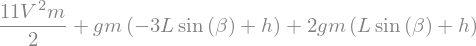

In [58]:
Eq2=A.energia(ktype='2')+B.energia(ktype='2');Eq2

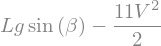

In [59]:
Eq3=opemat((Eq1-Eq2)/m,'s') ;Eq3 # adding two Eq and simplify store in Eq3

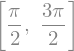

In [60]:
csolve(diff(Eq3,beta),beta) # find beta when diff Eq3=0

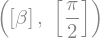

In [61]:
# we will pick only first answer and store in both physic object
A.store_val(beta,pi/2)
A.kvalue

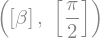

In [62]:
B.store_val(A.a,pi/2)
B.kvalue

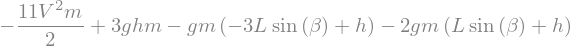

In [63]:
# finding  total energy in the system but knowing beta
Eq4=A.energia(ktype='1')+B.energia(ktype='1')-(A.energia(ktype='2')+B.energia(ktype='2'));Eq4

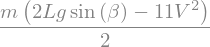

In [64]:
Eq4=opemat(Eq4,'s')
Eq4

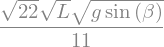

In [69]:
csolve(Eq4,V,korden=1)  # Velocity whe angle is pi/2

 <img src="images/line.png" alt="ml" style="width : 100%;"/>